# Библиотека Pandas

[Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html) - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [1]:
import pandas as pd

/tmp/ipykernel_279879/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---
## pandas: create from list

Чтение данных из различных источников является основным методом их получения. Однако при создании объекта можно передать список с данными, а сами данные можно пополнять и редактировать.

In [4]:
pd.DataFrame([[1,2,3], 
              [6,None,7]])

,0,1,2
0,1,2.0,3
1,6,NaN,7


In [5]:
df = pd.DataFrame([[1, [1,2]], [2, [3,4]]], columns=['==int==', 'list'])

In [6]:
df

,==int==,list
0,1,"[1, 2]"
1,2,"[3, 4]"


Это самый быстрый способ создания DataFrame. Постоянно добавлять в него куски - это долгое дело.

## Откуда берутся данные для обработки

Существует несколько общедоступных коллекций данных:
- **Kaggle** - http://www.kaggle.com , сайт соревнований, на который любой может выгрузить свой набор данных и предложить награду за лучшее решение.
- **Сайт Центра машинного обучения Массачуссетсого университета** - http://mlr.cs.umass.edu/ml/ - просто куча данных из разных областей.
- **GoogleCloud Public Data** - https://cloud.google.com/bigquery/public-data/ - наборы данных от Гугл.
- **AWS Open Data** - https://registry.opendata.aws/ - наборы данных от Амазон.
- Сервисы Яндекс.
- Правительственные сайты.
- Социальные сети.
- ...

## Загрузка и запись данных
Для чтения и записи данных в большом количестве форматов используются функции `pd.read_<формат>` и `pd.write_<формат>`, [например](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) `read_csv` и `write_csv` 

Параметры функции позволяют проводить тонкую настройку читаемых данных, но самые важные из них следующие:
 - `filepath_or_buffer` - текстовая строка с именем файла (в том числе, например, http-адресом);
 - `sep` - разделитель между данными;
 - `header` - номер строки, в которой в файле указаны названия столбцов, `None`, если нет;
 - `names` - список с названиями колонок;
 - `index_col` - номер столбца,  список, или ничего - названия строк.

In [7]:
# Давайте нажмем Shift-Tab и посмотрим передаваемые параметры.
train = pd.read_csv('data/00_titanic_train.csv')

## Описание данных

В результате будут прочитаны следующие данные.

| Variable | Definition | Key |
|----------|------------|-----|
|survival | Survival | 0 = No <br> 1 = Yes|
|pclass | Ticket class | 1 = 1st = Upper <br> 2 = 2nd = Middle <br> 3 = 3rd = Lower |
|sex | Sex | |
|Age | Age in years |  |
|sibsp | # of siblings <br> spouses aboard the Titanic | |
|parch | # of parents <br> children aboard the Titanic | |
|ticket | Ticket number | |
|fare | Passenger fare | |
|cabin | Cabin number | |
|embarked | Port of Embarkation | C = Cherbourg <br> Q = Queenstown <br> S = Southampton|

<b>age</b><br>
    Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp</b><br>
    The dataset defines family relations in this way...<br>
    Sibling = brother, sister, stepbrother, stepsister<br>
    Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch</b><br>
    The dataset defines family relations in this way...<br>
    Parent = mother, father<br>
    Child = daughter, son, stepdaughter, stepson<br>
    Some children travelled only with a nanny, therefore parch=0 for them.

Таблица с данными хранится в объекте типа [pd.DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

Рассмотрим некоторые методы данного класса

Следует помнить, что подавляющее большинство методов Pandas возвращает **копию** данных, то есть их необходимо присваивать в некоторые (например, те же самые) объекты.

## pandas: head, tail

```python
DataFrame.head(n=5)
```
Возвращает первые _n_ строк данных.

```python
DataFrame.tail(n=5)
```
Возвращает последние _n_ строк данных.

In [8]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## pandas: shape
Кортеж, хранящий количество строк и столбцов в наборе данных.

In [10]:
train.shape

(891, 12)

## pandas: columns, index

Хранят список названий (индексов) колонок и столбцов набора данных. **Все обращения к данным ведутся именно по этим названиям!**

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train.columns.values[0] = "asdf"# ["Cabin"]#="asdf"
train.columns

Index(['asdf', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Попробуем добавить к названиям колонок их номер.

In [13]:
train.columns = [a+":"+str(i) for i, a in enumerate(train.columns)]

In [14]:
train.columns

Index(['asdf:0', 'Survived:1', 'Pclass:2', 'Name:3', 'Sex:4', 'Age:5',
       'SibSp:6', 'Parch:7', 'Ticket:8', 'Fare:9', 'Cabin:10', 'Embarked:11'],
      dtype='object')

И знак доллара.

In [15]:
train.columns += '$'

In [16]:
train.columns

Index(['asdf:0$', 'Survived:1$', 'Pclass:2$', 'Name:3$', 'Sex:4$', 'Age:5$',
       'SibSp:6$', 'Parch:7$', 'Ticket:8$', 'Fare:9$', 'Cabin:10$',
       'Embarked:11$'],
      dtype='object')

Вернем всё как было.

In [2]:
train = pd.read_csv('data/00_titanic_train.csv')

In [127]:
for i in train.columns:
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


Названия строк хранятся в поле `index`.

In [19]:
train.index

RangeIndex(start=0, stop=891, step=1)

Список колонок можно заменить на другой список.

In [20]:
t2 = train.copy()
t2.columns = [str(i)+'. '+x for i, x in enumerate(t2.columns)]
t2.head(2)

,0. PassengerId,1. Survived,2. Pclass,3. Name,4. Sex,5. Age,6. SibSp,7. Parch,8. Ticket,9. Fare,10. Cabin,11. Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


С данных надо обязательно явно снимать копию, иначе две переменных будут показывать в одно и то же место.

Подавляющее большинство функций Pandas возвращают модифицированную копию или подмножество данных, которые надо куда-то записать. Эти функции не вносят изменения в исходные данные, для которых функция была вызвана.

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

При транспонировании при помощи метода `transpose()` или свойства `T` колонки и столбцы меняются местами.

In [22]:
train.head(4).transpose()

,0,1,2,3
PassengerId,1,2,3,4
Survived,0,1,1,1
Pclass,3,1,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)"
Sex,male,female,female,female
Age,22.0,38.0,26.0,35.0
SibSp,1,1,0,1
Parch,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803
Fare,7.25,71.2833,7.925,53.1


In [23]:
transpose_train = train.T

In [24]:
transpose_train.columns

RangeIndex(start=0, stop=891, step=1)

## pandas: info

Метод `info` позволяет получить некоторую аггрегированную информацию о том, какие данные хранятся в объекте.

In [128]:
train.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## pandas: describe
Позволяет посмотреть на статистические параметры данных.

In [26]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно задать персентили для отображения.

In [27]:
train.describe(percentiles=[0.9, 0.95, 0.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## pandas: Series
Данные в `DataFrame` хранятся "по столбцам", то есть первым идет индекс столбца. Столбец представляет собой объект типа `pandas.Series`. Обращаться к столбцам можно при помощи оператора квадратные скобки, либо как к свойству объекта `DataFrame`.

In [28]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
type(train['Name'])

pandas.core.series.Series

In [30]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Столбцы являются итерируемыми объектами.

In [31]:
%time 
for i in train['Name']:
    if ('john ' in i.lower()) or (i.endswith('John')):
        print(i)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)
Rogers, Mr. William John
Doling, Mrs. John T (Ada Julia Bone)
Barton, Mr. David John
Turpin, Mr. William John Robert
Cribb, Mr. John Hatfield
Bengtsson, Mr. John Viktor
Goldsmith, Master. Frank John William "Frankie"
Baumann, Mr. John D
Bourke, Mr. John
Perkin, Mr. John Henry
Mellors, Mr. William John
Lovell, Mr. John Hall ("Henry")
Sage, Mr. George John Jr
Goldsmith, Mrs. Frank John (Emily Alice Brown)
Adams, Mr. John
Matthews, Mr. William John
Smart, Mr. John Montgomery
Farthing, Mr. John
Goldsmith, Mr. Frank John
Davies, Master. John Morgan Jr
Thayer, Mr. John Borland Jr
Simmons, Mr. John
Flynn, Mr. John Irwin ("Irving")
Rush, Mr. Alfred George John
Thayer, Mrs. John Borland (Marian Longstreth Morris)
Ross, Mr. John Hugo
Jarvis, Mr. John Denzil
Chapman, Mr. John Henry
Horgan, Mr. John
Bowen, Mr. David John "Dai"
B

## pandas: map

Однако перебирать все элементы столбца в цикле - это не Pythonic Way. Для этого существует функция map, которая позволяет применить к данным переданный метод.

In [32]:
%%timeit
# Классическое решение.
total_len = 0
for i in train['Name']:
    total_len += len(i)
# print(total_len)

67.5 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Посмотрим, что может выдавать `map`.

In [135]:
train['Name'].map(len)

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [34]:
%%timeit
total_len2 = train['Name'].map(len).sum()

168 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Для примера посмотрим, как можно передавать в качестве параметра функции.

In [35]:
%%timeit
total_len3 = sum(train['Name'].map(lambda x:len(x)))

242 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
print(train['Name'].map(len).sum(), sum(train['Name'].map(lambda x:len(x))))

24026 24026


In [40]:
def is_Mr(s):
    return 'Mr. ' in s

In [41]:
train['Name'].map(is_Mr)

0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

In [42]:
train['Name'].map(lambda s: 'Mr. ' in s)

0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

In [136]:
train['Name'].str.contains('Mr. ')

0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

Для того, чтобы создать новый столбец, достаточно присвоить ему какое-то значение.

Если вы присваиваете скалярное значение (число, строка, ...), то оно присваивается каждой ячейке этого столбца. Если присваивается итерируемое значение (например, список), его длина должна равняться длине столбца данных, а значения раскладываются по соответствующим строчкам.

In [137]:
new_train = train.copy()
new_train['No1'] = 1
new_train['is_Petr'] = new_train['Name'].map(lambda s: 'Petr' in s)
new_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,No1,is_Petr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,False


Однако, для большинства случаев у объектов типа Series уже есть встроенные функции.

In [44]:
train.Age.median()

28.0

In [45]:
%time
train['Name'].str.contains('Mr. ')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 15.3 µs


0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

In [46]:
train['Name'].is_unique

True

In [47]:
train['PassengerId'].is_unique

True

In [48]:
train['Age'].is_unique

False

## Выборка данных

Для того, чтобы выбрать несколько колонок, необходимо передать в квадратные скобки список с их названиями. В результате будет образована копия данных, хранимых именно в этих колонках.

In [49]:
new_train[['PassengerId', 'Embarked', 'Pclass']]

,PassengerId,Embarked,Pclass
0,1,S,3
1,2,C,1
2,3,S,3
3,4,S,1
4,5,S,3
...,...,...,...
886,887,S,2
887,888,S,1
888,889,S,3
889,890,C,1


Над объектом типа Series (колонкой) можно совершать логические действия. Результатом будет еще один объект Series, который хранит булевские значения, являющиеся результатами этого логического действия для каждого элемента данных.

In [50]:
train['Sex'] == 'male'

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

Подобные "булевские" массивы данных можно использовать для выборки строк. Если в квадратные скобки передать Series или список, содержащие булевские значения, будут выбраны только те строки, которым соответствуют истинные значения.

In [51]:
train[train['Sex'] == 'male'].head(3)
#train[[i%2==0 for i in range(train.shape[0])]].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [52]:
train[train['PassengerId'] == 111]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0,C110,S


In [53]:
train[train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Подобные фильтры можно накладывать последовательно...

In [54]:
%%timeit
train[train['Sex'] != 'male'][train['Age'] < 20][train['Name'].str.contains('John')]

<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be re

972 µs ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<magic-timeit>:1: UserWarning: Boolean Series key will be re

... но так делать не надо. Лучше использовать операторы над множествами: & - пересечение, | - объединение, ~ - инверсия. При этом следует не забывать использовать круглые скобки для разделения фрагментов условий.

In [55]:
%%timeit
ttt = train[(train['Sex'] != 'male') & (train['Age'] < 20) & (train['Name'].str.contains('John'))]
ttt

501 µs ± 36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
train[
    train['Embarked'].isin(['Q', 'C']) & (train['Age'] > 40)
].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [57]:
train[~train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Индексирование по позиции

До сих пор для инексирования мы использовали названия столбцов и индексы строк. При этом не обязательно использовать только единственные значения, но можно использовать и срезы. Для этих целей можно использовать свойство `loc`.

In [58]:
tmp = train[
    train['Embarked'].isin(['Q', 'C']) & (train['Age'] > 40)
].head(100)

Здесь используется запятая, сперва идут значения индекса, затем названия колонок.

Обратите внимание, что индекс не обязан быть числовым.

In [145]:
tmp.loc[:,'Pclass':].head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
155,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [60]:
tmp.loc[54:116, 'Pclass':'Parch']

,Pclass,Name,Sex,Age,SibSp,Parch
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1
96,1,"Goldschmidt, Mr. George B",male,71.0,0,0
116,3,"Connors, Mr. Patrick",male,70.5,0,0


In [61]:
tmp.head(5).T.index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Также можно передавать списки интересующих нас строк или столбцов.

In [62]:
tmp.loc[[54, 116]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


Для получения значений по номеру строки или столбца можно использовать свойство `iloc`.

In [63]:
tmp.iloc[0:5, 2:8]

,Pclass,Name,Sex,Age,SibSp,Parch
52,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1
96,1,"Goldschmidt, Mr. George B",male,71.0,0,0
116,3,"Connors, Mr. Patrick",male,70.5,0,0
155,1,"Williams, Mr. Charles Duane",male,51.0,0,1


Для обработки данных нам доступны практически все аналоги запросов из SQL. Например, при помощи функции `merge` можно провести аналог Join для нескольких `DataFrame`.

In [64]:
df_embarked = pd.DataFrame(
    [
        ['C', 'Cherbourg'],
        ['Q', 'Queenstown']
    ],
    columns=['id', 'City']
)

In [65]:
df_embarked

,id,City
0,C,Cherbourg
1,Q,Queenstown


In [66]:
pd.merge(
    train,
    df_embarked,
    how='outer',
    left_on='Embarked',
    right_on='id'
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,id,City
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Cherbourg
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,C,Cherbourg
2,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,C,Cherbourg
3,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,C,Cherbourg
4,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,C,Cherbourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,NaN,NaN


In [67]:
ttt=pd.merge(
    train,
    df_embarked,
    how='outer',
    left_on='Embarked',
    right_on='id'
)
train3=ttt.loc[:,'PassengerId':'Cabin']
train3['City']=ttt['City']

train3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,City
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherbourg
2,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,Cherbourg
3,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,Cherbourg
4,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,Cherbourg


Объединение данных производится при помощи функции concat.

In [68]:
pd.concat(
    [train.head(), train.head()], ignore_index=True
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
6,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
7,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Данные могут быть отсортированы, ...

In [69]:
train.sort_values('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


In [70]:
train.sort_values(['Fare', 'Name'], ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S


... сгруппированы (не забывайте указывать функцию группировки), ...

In [71]:
tmp2 = train[['PassengerId', 'Sex']].groupby('Sex').count()
tmp2

,PassengerId
Sex,
female,314
male,577


In [72]:
tmp2 = train[['PassengerId', 'Cabin', 'Sex']].groupby(['Sex', 'Cabin']).count()

In [73]:
tmp2

PassengerId
Sex    Cabin             
female A16              1
       B18              2
       B20              1
       B22              1
       B28              2
...                   ...
male   F G73            2
       F2               3
       F38              1
       F4               1
       T                1

[171 rows x 1 columns]

In [74]:
train[['Age', 'Sex']].groupby('Sex').median()

,Age
Sex,
female,27.0
male,29.0


... наконец, при помощи функции `pivot_table` можно аггрегировать данные по нужной функции (по умолчанию - count).

In [75]:
d = train.pivot_table(
    'PassengerId', 'Sex', 'Survived', 'count')
d

Survived,0,1
Sex,,
female,81,233
male,468,109


In [76]:
d = train.pivot_table(
    'Age', ['Pclass', 'Sex'], 'Survived', 'mean')
#    'PassengerId', 'Pclass', 'Survived', 'count')

In [77]:
d

Survived               0          1
Pclass Sex                         
1      female  25.666667  34.939024
       male    44.581967  36.248000
2      female  36.000000  28.080882
       male    33.369048  16.022000
3      female  23.818182  19.329787
       male    27.255814  22.274211

In [78]:
# процент выживших/погибших по классам
d.div(d.sum(1), axis='rows')

Survived              0         1
Pclass Sex                       
1      female  0.423503  0.576497
       male    0.551552  0.448448
2      female  0.561790  0.438210
       male    0.675609  0.324391
3      female  0.552012  0.447988
       male    0.550289  0.449711

# Визуализация данных с использованием библиотеки Seaborn

Небольшое сравнение разных библиотек можно найти [здесь](https://github.com/klyshinsky/AdvancedPython_2021_22/blob/main/lecture_20220115_matplotlib%2Bseaborn%2Bplotly%2Bipywidgets.ipynb). В текущей тетрадке мы просто посмотрим на некоторые возможности визуализации данных.

In [3]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

/home/edward/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Библиотека Seaborn создавалась специально для работы с Pandas. Поэтому можно передавать объекты типа DataFrameв отрисовку Seaborn. И наоборот, каждый объект DataFrame может отрисовать себя сам при помощи Seaborn.

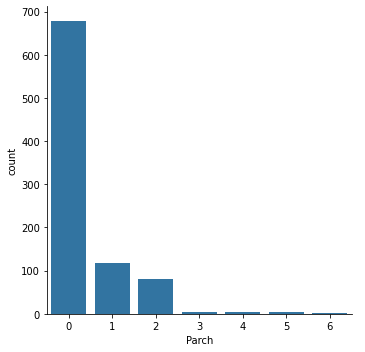

In [ ]:
sns.catplot(data=train, x='Parch', kind='count');

<Axes: xlabel='Parch'>

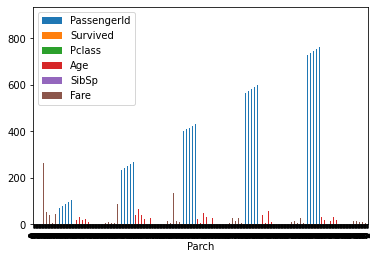

In [10]:
train.plot.bar('Parch')

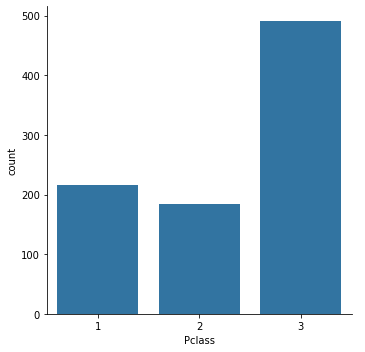

In [81]:
sns.catplot(data=train, x='Pclass', kind='count');

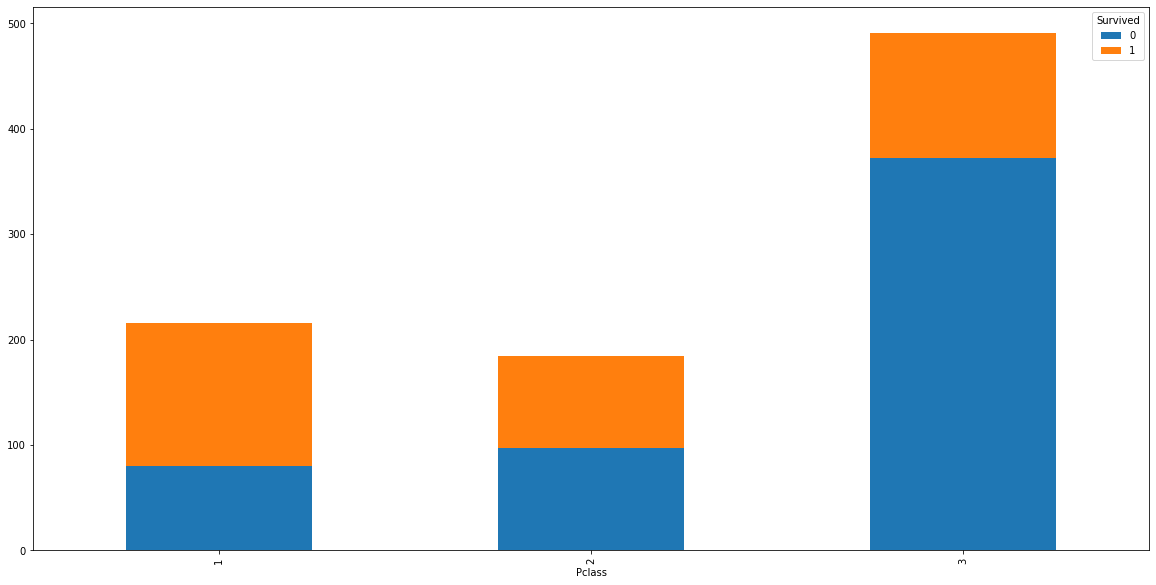

In [13]:
_, ax_my_lovely = plt.subplots(figsize=(20,10))

train.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count').plot(
    kind='bar', stacked=True, ax=ax_my_lovely
)

plt.show()

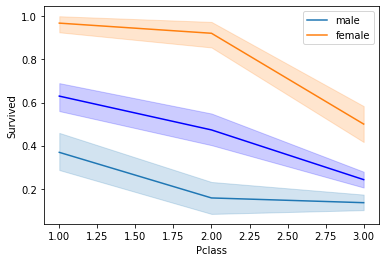

In [14]:
ax_m = sns.lineplot(data=train, x='Pclass', y='Survived', hue='Sex');
sns.lineplot(data=train, x='Pclass', y='Survived', c='b', ax=ax_m);

In [84]:
ax

<Axes: xlabel='Pclass', ylabel='Survived'>

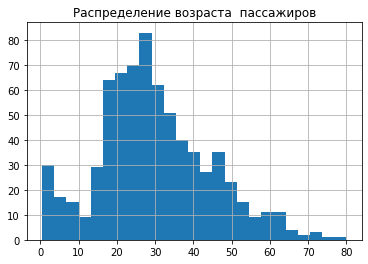

In [85]:
train['Age'].hist(bins=25)
plt.title("Распределение возраста  пассажиров");

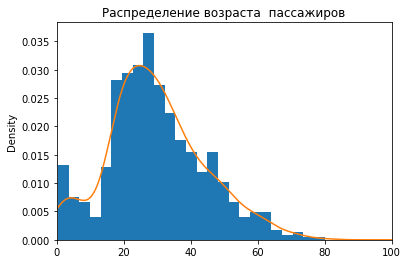

In [86]:
train['Age'].hist(bins=25, density=True)
train['Age'].plot(kind='kde')

plt.xlim(0, 100)
plt.title("Распределение возраста  пассажиров");

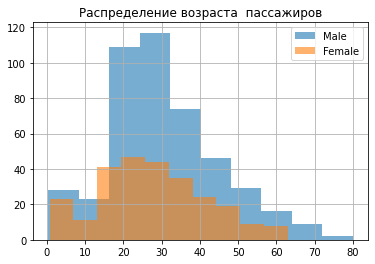

In [87]:
train['Age'][train.Sex=="male"].hist(alpha=0.6, label="Male")
train['Age'][train.Sex=="female"].hist(alpha=0.6, label="Female")
plt.legend()
plt.title("Распределение возраста  пассажиров");

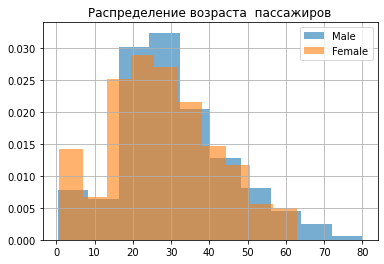

In [88]:
train['Age'][train.Sex=="male"].hist(alpha=0.6, label="Male", density=True)
train['Age'][train.Sex=="female"].hist(alpha=0.6, label="Female", density=True)
plt.legend()
plt.title("Распределение возраста  пассажиров");

In [89]:
train[train.Sex=='male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


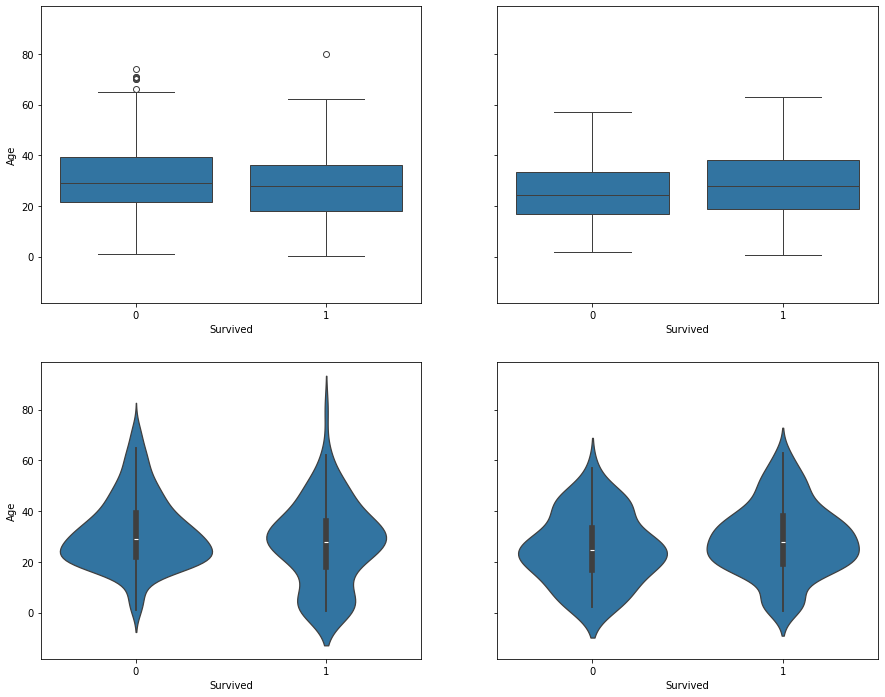

In [90]:
_, axes = plt.subplots(2, 2, sharey=True, figsize=(15,12))

sns.boxplot(x='Survived', y='Age', data=train[train.Sex=='male'], ax=axes[0, 0]);
sns.boxplot(x='Survived', y='Age', data=train[train.Sex=='female'], ax=axes[0, 1]);

sns.violinplot(x='Survived', y='Age', data=train[train.Sex=='male'], ax=axes[1, 0]);
sns.violinplot(x='Survived', y='Age', data=train[train.Sex=='female'], ax=axes[1, 1]);

In [91]:
df_numeric = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [92]:
df_numeric['Age'] = df_numeric['Age'].fillna(-1)

In [93]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr('kendall'), annot=True);

ValueError: could not convert string to float: 'male'

<Figure size 864x720 with 0 Axes>

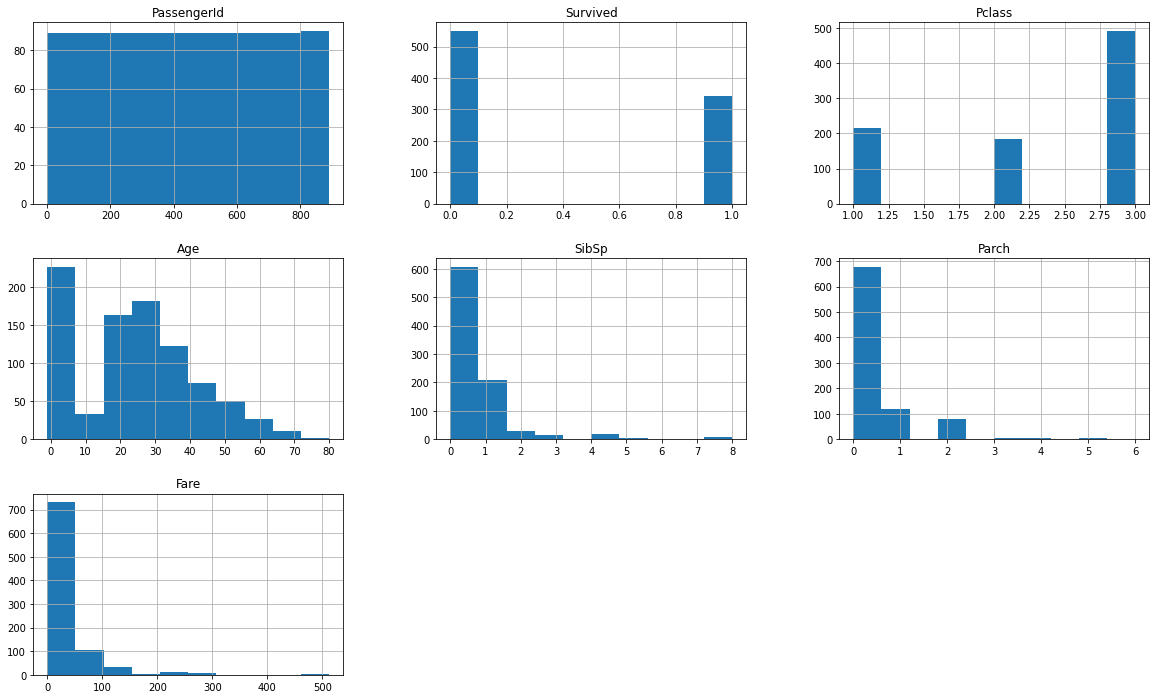

In [94]:
df_numeric.hist(figsize=(20, 12));

In [95]:
train3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,City
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherbourg
2,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,Cherbourg
3,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,Cherbourg
4,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,Cherbourg


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Sex       714 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 33.5+ KB


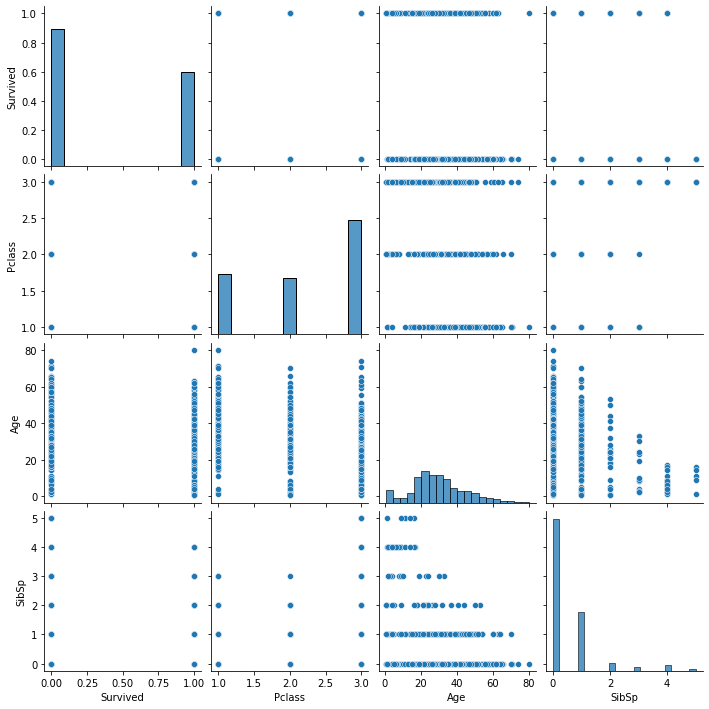

In [97]:
train2 = pd.read_csv('data/00_titanic_train.csv')
train3 = train2[['Survived', 'Pclass', 'Age', 'SibSp', 'Sex']]
train3 = train3.dropna()
train3.info()
sns.pairplot(data = train3)

## Предобработка данных

Для того, чтобы данные хорошо анализировались, надо их хорошенько [предобработать](https://scikit-learn.org/stable/modules/preprocessing).

Данные можно разделить на:
- числовые;
- естественного порядка;
- категориальные.

In [98]:
# Переведем Embarked из строковых значений в числовые
from sklearn.preprocessing import LabelEncoder

In [99]:
titanic2 = train.copy()

In [100]:
titanic2.Embarked[titanic2.Embarked.isna()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [101]:
titanic2.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [102]:
titanic2.Embarked[:5]

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [103]:
titanic2_1 = titanic2.copy()
lenc = LabelEncoder()
lenc.fit(titanic2_1.Embarked)
titanic2_1.Embarked = lenc.transform(titanic2_1.Embarked)
lenc.classes_  

array(['C', 'Q', 'S', nan], dtype=object)

In [104]:
titanic2_1.Embarked[:5]

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [105]:
titanic2_1.Embarked[titanic2_1.Embarked.isna()]

Series([], Name: Embarked, dtype: int64)

In [106]:
titanic2_1.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         3
Name: 61, dtype: object

In [107]:
lenc = LabelEncoder()
titanic2.Embarked = titanic2.Embarked.fillna('S')
lenc.fit(titanic2.Embarked)
titanic2.Embarked = lenc.transform(titanic2.Embarked)
lenc.classes_

array(['C', 'Q', 'S'], dtype=object)

In [108]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


Используем One Hot Encoding.

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
titanic2_1 = train.copy()
titanic2_1 = titanic2_1.dropna(axis = 0, subset = ['Embarked'])

oenc = OneHotEncoder()
oenc.fit(titanic2_1.Embarked.to_numpy().reshape(-1, 1))
res = oenc.transform(titanic2_1.Embarked.to_numpy().reshape(-1, 1)).toarray()

In [111]:
titanic2_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
oenc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [113]:
res

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [114]:
titanic2_1['EmbarkedC'] = [x[0] for x in res]
titanic2_1['EmbarkedQ'] = [x[1] for x in res]
titanic2_1['EmbarkedS'] = [x[2] for x in res]
titanic2_1 = titanic2_1.drop(labels = ['Embarked'], axis = 1, )

In [115]:
titanic2_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,EmbarkedC,EmbarkedQ,EmbarkedS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0


Посмотрим на нормализацию данных.

In [116]:
from sklearn.preprocessing import MinMaxScaler

import random

In [117]:
titanic3 = train.copy()
titanic3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [118]:
lenc = LabelEncoder()
titanic3.Embarked = titanic3.Embarked.fillna('S')
titanic3.Embarked = lenc.fit_transform(titanic3.Embarked)

In [119]:
for col in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    titanic3[col] = MinMaxScaler().fit_transform(titanic3[col].to_numpy().reshape(-1, 1))

In [120]:
titanic3[titanic3.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,1.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,0.016510,NaN,0.5
17,18,1,0.5,"Williams, Mr. Charles Eugene",male,NaN,0.0,0.0,244373,0.025374,NaN,1.0
19,20,1,1.0,"Masselmani, Mrs. Fatima",female,NaN,0.0,0.0,2649,0.014102,NaN,0.0
26,27,0,1.0,"Emir, Mr. Farred Chehab",male,NaN,0.0,0.0,2631,0.014102,NaN,0.0
28,29,1,1.0,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0.0,0.0,330959,0.015379,NaN,0.5


Сохранились NaN в возрасте, с ними надо что-то делать.

In [121]:
titanic3 = train.copy()

In [122]:
lenc = LabelEncoder()
titanic3.Embarked = titanic3.Embarked.fillna('S')
lenc.fit(titanic3.Embarked)
titanic3.Embarked = lenc.transform(titanic3.Embarked)

In [123]:
titanic3.Age = titanic3.Age.map(lambda x: 
                random.uniform(titanic3.Age.mean() - titanic3.Age.std(), 
                               titanic3.Age.mean() + titanic3.Age.std()) \
                if x != x else x)


In [124]:
titanic3[titanic3.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [125]:
for col in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    titanic3[col] = MinMaxScaler().fit_transform(titanic3[col].to_numpy().reshape(-1, 1))

Теперь все данные нормализованы, можно проводить расчеты.

Для рассчета расстояний между объектами существует достаточно много различных мер. Обычно мы используем Евклидово расстояние: $d_E=\sqrt{\sum {(a_i-b_i)^2}}$. Но при обработке текстов оно работает гораздо хуже. Представим себе, что у нас есть два текста: текст статьи и текст статьи, объединенный с самим собой. Евклидово расстояние между ними будет значительным, тогда как содержание не изменится.

Помимо Евклидового расстояния часто используется Манхэттенское расстояние (расстояние городских кварталов). Если взглянуть на карту Манхэттена, то мы увидим, что практически все улицы параллельны и перпендикулярны друг другу. Это означает, что выбирая любой не удлинняющий маршрут из одной точки в другую я пройду одно и то же расстояние: $d_M=\sum {|a_i-b_i|}$. Манхэттенское расстояние используется в тех случаях, когда мы берем, например, взвешенную сумму параметров с тем, чтобы получить единую оценку. Например, оценивая различные офисы мы складываем с некоторыми коэффициентами стоимость, площадь, расстояние от центра или дома, оценку инфраструктуры и так далее. Аналогично можно брать разницу между двумя векторными представлениями офисов, чтобы найти насколько они сходны.

Совершенно не обязательно возводить разницу координат именно в квадрат. Фактически, Манхеттеновское расстояние является корнем первой степени (модулем). Если степень в $d=\sqrt[n]{\sum {(a_i-b_i)^n}}$ устремить к бесконечноcти, мы получим максимум из мер: $d_{max}=\max{|(a_i-b_i)|}$. Точно так же можно устремить n к минус бесконечности, тогда мы получим одну из точек на координатных осях. Результаты можно интерпретировать графически.



Расстояние Жаккарда берет отношение размера пересечения словарей к их объединению: 
$$d_J=\frac{A \cup B}{A \cap B}.$$ 
Эта мера проверяет степень совпадения словарей двух текстов. Если словари совпадают полностью, то тексты, скорее всего, говорят об одном и том же.

Однако, в одном тексте может обсуждаться производство шестеренок, а во вводной части однажды будет упомянуто, что они необходимы для сбора механизмов, тогда как в другом тексте будут обсуждаться сами механизмы с единственным упоминанием, что они состоят из шестеренок. Случайное появление отдельных слов сделает тексты более похожими, чем это следует из их содержания. Этот недостаток устраняет косинусная мера сходства: 
$$d_{cos}=\frac{\sum{a_i * b_i}}{\sqrt {\sum{a_i^2}*\sum{b_i^2}}}.$$
Если в одном из текстов не встречается слово из другого текста, то соответствующий член суммы в числителе будет равен нулю. Если в одном тексте слово встречается часто, а в другом редко, произведение не будет слишком большим. Проблему представляет случай, когда в обоих текстах есть несколько очень часто встречающихся слов. Тогда их произведение будет забивать все остальные слова, искажая общий смысл.

Следует иметь в виду, что косинусная мера сходства является величиной, обратно зависящей от расстояния: два одинаковых текста будут иметь косинусное сходство равное 1, тогда как расстояние между ними равно нулю, и наоборот. Рисунок ниже наглядно показывает, что косинусное и Евклидово расстоение далеко не всегда связаны между собой.
<center><img src='img/cosine_watch.jpg'></center>

В качестве мер расстояния также используются [корреляция](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F) и [дивергенция Кулльбака-Лейблера](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9A%D1%83%D0%BB%D1%8C%D0%B1%D0%B0%D0%BA%D0%B0_%E2%80%94_%D0%9B%D0%B5%D0%B9%D0%B1%D0%BB%D0%B5%D1%80%D0%B0).

$$
KL(P \| Q) = \sum_z P(z) \log \frac{P(z)}{Q(z)}
$$

<center><img src='img/kld.png' width="90%"></center>